In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/topredditcomments/Top_Posts_Comments.csv
/kaggle/input/topredditcomments/Top_Posts.csv


In [31]:
#create a dictionary with coment extracted from one file with the resultant classes from another file
# common thing is their ID


In [32]:
import random
import numpy as np

In [33]:
file_path = os.path.expanduser('/kaggle/input/topredditcomments/Top_Posts.csv')
df_classes = pd.read_csv(file_path, encoding='ISO-8859-1')
df_classes.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,https://v.redd.it/25nxi9ojfha61,Discussion,5851,133,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,https://v.redd.it/rlmmjm1q5wu41,Research,4761,111,0.97,2020-04-25 04:27:23,2020
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,https://v.redd.it/ikd5gjlbi8k61,News,4688,230,0.97,2021-02-28 15:12:28,2021
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,https://i.redd.it/34sgziebfia71.jpg,Discussion,4568,228,0.96,2021-07-11 04:18:59,2021


In [34]:
classes = {}
matrix01 = df_classes[df_classes.columns[0]]
matrix02 = df_classes[df_classes.columns[2]]
# print(matrix01)
# print(matrix02)
for j in range(len(matrix01)):
    classes[matrix01[j]] = matrix02[j]
# print(classes)

In [35]:
file_path = os.path.expanduser('/kaggle/input/topredditcomments/Top_Posts_Comments.csv')
df_comments = pd.read_csv(file_path, encoding='ISO-8859-1')
df_comments.head()

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future ð¤¯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...


In [36]:


#comments dictionary where value is the post_id
comments = {}
matrix1 = df_comments[df_comments.columns[0]]
matrix2 = df_comments[df_comments.columns[1]]



for i in range(len(matrix2)):
    comments[matrix2[i]] = matrix1[i]
    
# print(comments)
#comments has {comment:postid}
#classes have {postid:class}


In [37]:
# print(list(comments.keys())[0])
# print(list(classes.values())[0])

comment = {}

for m in range(1000):
    key, value = random.choice(list(comments.items()))
    comment[key] =  value
# print(comment)


In [38]:
#comments has {comment:postid}
#classes have {postid:class}
#final dictionary should have {comments:classes}
print(len(classes))
print(len(comment))
final ={}
for k in range(len(comment)):
    for l in range(len(classes)):
        if list(comment.values())[k] == list(classes.keys())[l]:
            final[list(comment.keys())[k]] = list(classes.values())[l]
#final is the dictionary which contains comments and the corresponding classes, we will use this for training

2987
997


***CLASSIFICATION USING NAIVE BAYES ALGORITHM***

In [39]:
#taking only the comments out
com = list(comment.keys())
#the code below from my previous assignment
def build_vocab(data_dev):
    # Create a dictionary to store the word occurrences
    word_counts = {}

    # Iterate through each word and update the counts in the dictionary
    for i in range(len(data_dev)):
        review_one = data_dev[i].split()
        for j in range(len(review_one)) :
            if review_one[j] not in word_counts:
                word_counts[review_one[j]] = 0
            word_counts[review_one[j]] += 1
    return word_counts

word_counts = build_vocab(com)

In [40]:
# print(build_vocab(com))

In [41]:
#Eliminating words whose occurrence is <5
def final_words(word_counts_unfiltered):
    for word in list(word_counts_unfiltered.keys()):
        if (word_counts_unfiltered[word] < 5):
            del word_counts_unfiltered[word]
    words = list(word_counts_unfiltered)
    return words
words = final_words(word_counts)
print(words)

['No', 'one', 'who', 'has', 'ever', 'to', 'anyone', 'worked', 'with', 'Andrew', 'could', 'doubt', 'he', 'would', 'say', 'something', 'like', 'that.', 'It', 'used', 'hours', 'But', 'does', 'this', 'the', 'of', 'about', 'Machine', 'Learning', 'otherwise', 'they', 'not', 'even', 'The', 'way', 'I', 'understand', 'it', 'is', 'that', 'their', 'other', 'business', 'have', 'a', 'much', 'better', 'and', 'on', 'ML', 'dev', 'front', 'takes', 'huge', 'amount', 'money', 'risk', 'for', 'maybe', 'reward', 'since', 'many', 'important', 'such', 'as', 'will', 'be', 'very', 'hard', 'am', 'are', 'still', 'trying', 'figure', 'out', 'right', 'before', 'There', 'lots', 'companies', 'so', 'keep', 'find', 'what', 'you.', 'As', 'particular', 'job,', 'pass', "I'll", 'take', 'it.', 'If', "you're", 'you', 'think', "you'll", 'get', 'job', 'offer', 'You', 'can', 'want', 'data', 'science.', 'years', 'science', 'statistics', 'your', 'R', 'What', 'wrote', 'where', "it's", 'true', 'easier', 'natural', 'code', 'into', "d

In [42]:
#to get the unique classes 
clas = list(final.values())
x = np.array(clas)
print(np.unique(x))

['MachineLearning' 'artificial' 'datascience']


In [43]:
#Dividing the dataset into classes
data_dev ={}
data_dev = final
num_documents = len(data_dev)
arti ={}
ML ={}
DS ={}
#creating different dictionaries for each class
for key, value in final.items():
    if(value == 'artificial'):
        arti[key] = value
    if(value == 'MachineLearning'):
        ML[key] = value
    if(value == 'datascience'):
        DS[key] = value
    



In [44]:
# Probability of occurrence
#P[“the”] = num of documents containing ‘the’ / num of all documents
#P[“the” | Positive]  = 
# of positive documents containing “the” / num of all positive review documents
def calc_probabilities(data,words):
    print(words[1])
    #num of documents containing ‘doesn't’
    word_occurrences = {}
    word_occurrences_AI = {}
    word_occurrences_ML = {}
    word_occurrences_DM ={}
    
    num_of_all_documents = len(data)
    for k in range(len(words)):
        num_of_documents_containing = 0
        num_of_AI_documents_containing = 0
        num_of_ML_documents_containing = 0
        num_of_DM_documents_containing = 0

        # Iterate through each word and update the counts in the dictionary
        for i in range(len(data)):
            comment_one = list(data.keys())[i].split()
            for j in range(len(comment_one)) :
                if comment_one[j] == words[k]: # change here for different words
                    num_of_documents_containing += 1
                    if (list(data.values())[i]) == 'MachineLearning':
                         num_of_ML_documents_containing +=1
                    if (list(data.values())[i]) == 'artificial':
                         num_of_AI_documents_containing +=1
                    if (list(data.values())[i]) == 'datascience':
                         num_of_DM_documents_containing +=1

        word_occurrences[words[k]] = num_of_documents_containing/num_of_all_documents
        word_occurrences_AI[words[k]] =  num_of_AI_documents_containing/num_of_all_documents
        word_occurrences_ML[words[k]] =  num_of_ML_documents_containing/num_of_all_documents
        word_occurrences_DM[words[k]] =  num_of_DM_documents_containing/num_of_all_documents
               
    return word_occurrences, word_occurrences_AI, word_occurrences_ML, word_occurrences_DM   

word_occurrences, word_occurrences_AI, word_occurrences_ML,word_occurrences_DM = calc_probabilities(data_dev,words)

one


In [45]:
#To check if code is running correctly, displaying probabilities of any word
print(words[1])
print(word_occurrences[words[1]])
print("*******")
print(word_occurrences_AI[words[1]])
print("*******")
print(word_occurrences_ML[words[1]])
print("*******")
print(word_occurrences_DM[words[1]])

one
0.10431293881644935
*******
0.004012036108324975
*******
0.05717151454363089
*******
0.04312938816449348


In [46]:
#Prediction and accuracy of development data(1000 comments)
def calc_accuracy(data,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM ,words):
    # Calculate the accuracy on the development set
    num_correct = 0
    for a in range(len(data)):
        prob_ML = 1
        prob_AI = 1
        prob_DM = 1
        comment_for_acc = list(data.keys())[a].split()
        for b in range(len(comment_for_acc)) :
                if comment_for_acc[b] in words:
                    prob_ML *= word_occurrences_ML[comment_for_acc[b]]
                    prob_AI *= word_occurrences_AI[comment_for_acc[b]]
                    prob_DM *= word_occurrences_DM[comment_for_acc[b]]
                    
        if prob_ML >= prob_AI and prob_ML >= prob_DM and list(data.values())[a] == 'MachineLearning':
            num_correct += 1
        if prob_AI >= prob_ML and prob_AI >= prob_DM and list(data.values())[a] == 'artificial':
            num_correct += 1
        if prob_DM >= prob_ML and prob_DM >= prob_AI and list(data.values())[a] == 'datascience':
            num_correct += 1
        
       
    accuracy = num_correct / len(data)
    return accuracy
accuracy = calc_accuracy(data_dev,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM,words)
print(accuracy)


0.7683049147442327


***IMPROVING ACCURACY USING LAPLACE SMOOTHING***

In [47]:
def do_change_in_probab(word,value,rev):
    if value == 'MachineLearning':
        word_occurrences['word'] = 5/len(rev)
        word_occurrences_AI['word']= 5/len(rev) 
        word_occurrences_ML['word']= 1/len(rev) 
        word_occurrences_DM['word']= 1/len(rev)
    if value == 'artificial':
        word_occurrences['word'] = 5/len(rev)
        word_occurrences_AI['word']= 1/len(rev) 
        word_occurrences_ML['word']= 5/len(rev) 
        word_occurrences_DM['word']= 1/len(rev)
    if value == 'datascience':
        word_occurrences['word'] = 5/len(rev)
        word_occurrences_AI['word']= 1/len(rev) 
        word_occurrences_ML['word']= 1/len(rev) 
        word_occurrences_DM['word']= 5/len(rev)
    return word_occurrences_AI['word'], word_occurrences_ML['word'], word_occurrences_DM['word']

In [48]:
def calc_accuracy_smooth(words,data,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM):
    # Calculate the accuracy on the development set with smoothing
    num_correct = 0
    for a in range(len(data)):
        prob_ML = 1
        prob_AI = 1
        prob_DM = 1
        comment_for_acc = list(data.keys())[a].split()
        for b in range(len(comment_for_acc)) :
                if comment_for_acc[b] in words:
                    prob_ML *= word_occurrences_ML[comment_for_acc[b]]
                    prob_AI *= word_occurrences_AI[comment_for_acc[b]]
                    prob_DM *= word_occurrences_DM[comment_for_acc[b]]
                else:
                    #print("yes",review_for_acc[b])
                    word_occurrences_AI[comment_for_acc[b]], word_occurrences_ML[comment_for_acc[b]], word_occurrences_DM[comment_for_acc[b]] = do_change_in_probab(comment_for_acc[b],list(data.values())[a],data)
                    
                    prob_ML *= word_occurrences_ML[comment_for_acc[b]]
                    prob_AI *= word_occurrences_AI[comment_for_acc[b]]
                    prob_DM *= word_occurrences_DM[comment_for_acc[b]]
        if prob_ML >= prob_AI and prob_ML >= prob_DM and list(data.values())[a] == 'MachineLearning':
            num_correct += 1
        if prob_AI >= prob_ML and prob_AI >= prob_DM and list(data.values())[a] == 'artificial':
            num_correct += 1
        if prob_DM >= prob_ML and prob_DM >= prob_AI and list(data.values())[a] == 'datascience':
            num_correct += 1
    accuracy = num_correct / len(data)
    return accuracy
accuracy_smooth = calc_accuracy_smooth(words,data_dev,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM)
print(accuracy_smooth)

0.8264794383149449


***TOP 10 WORDS WHICH AFFECT EACH CLASS***

In [49]:
#P(Class/word) = (P(word/class)*p(class))/ P(word)
#Pclass = 0.5
def top_10_words(words_imp,word_occurrences,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM):
    # Calculate P[class | word] for each word in the vocabulary
    
    p_AI = {}
    top_10_AI_words = {}
    for k in words_imp:
        pro = 1
        pro = (word_occurrences_AI[k] * 0.5) / word_occurrences[k]
        p_AI[k] = pro
    #print(p_fresh)
    top_10_AI_words = sorted(p_AI.items(), key=lambda x: x[1], reverse=True) 
    #print(top_10_fresh_words)
    print("For Artificial class")
    for key, value in top_10_AI_words[:10]:
        print("artificial",key, value)
    print("")   
    print("*******************************")
    print("")
    
    p_ML = {}
    top_10_ML_words = {}
    for k in words_imp:
        pro = 1
        pro = (word_occurrences_ML[k] * 0.5) / word_occurrences[k]
        p_ML[k] = pro
    #print(p_fresh)
    top_10_ML_words = sorted(p_ML.items(), key=lambda x: x[1], reverse=True) 
    #print(top_10_fresh_words)
    print("For Machine Learning class")
    for key, value in top_10_ML_words[:10]:
        print("MachineLearning",key, value)
        
    print("")   
    print("*******************************")
    print("")
    
    p_DM = {}
    top_10_DM_words = {}
    for k in words_imp:
        pro = 1
        pro = (word_occurrences_DM[k] * 0.5) / word_occurrences[k]
        p_DM[k] = pro
    #print(p_fresh)
    top_10_DM_words = sorted(p_DM.items(), key=lambda x: x[1], reverse=True) 

    print("For Data Science class")
    for key, value in top_10_DM_words[:10]:
        print("datascience",key, value)
    
top_10_words(words,word_occurrences,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM)

For Artificial class
artificial word 0.5
artificial Aigo 0.5
artificial â 0.4375
artificial AGI 0.4166666666666667
artificial AI, 0.4
artificial dreams 0.4
artificial Human 0.4
artificial : 0.4
artificial know, 0.4
artificial DeepMind 0.4

*******************************

For Machine Learning class
MachineLearning reward 0.5
MachineLearning result 0.5
MachineLearning forward 0.5
MachineLearning color 0.5
MachineLearning talks 0.5
MachineLearning copyright 0.5
MachineLearning author 0.5
MachineLearning publish 0.5
MachineLearning economic 0.5
MachineLearning chapter 0.5

*******************************

For Data Science class
datascience you'll 0.5
datascience R 0.5
datascience modeling 0.5
datascience R. 0.5
datascience automate 0.5
datascience personal 0.5
datascience experience. 0.5
datascience environment 0.5
datascience folks 0.5
datascience analysts 0.5


***TEST DATA ACCURACY***

In [50]:
comment_test = {}

for m in range(500):
    key, value = random.choice(list(comments.items()))
    comment_test[key] =  value
# print(comment)
data_test ={}
for k in range(len(comment_test)):
    for l in range(len(classes)):
        if list(comment_test.values())[k] == list(classes.keys())[l]:
            data_test[list(comment_test.keys())[k]] = list(classes.values())[l]
#final is the dictionary which contains comments and the corresponding classes, we will use this for testing

In [51]:
accuracy_final = calc_accuracy(data_test,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM,words)
print(accuracy_final)

0.625250501002004


In [52]:
accuracy_smooth = calc_accuracy_smooth(words,data_test,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM)
print(accuracy_smooth)

0.7254509018036072


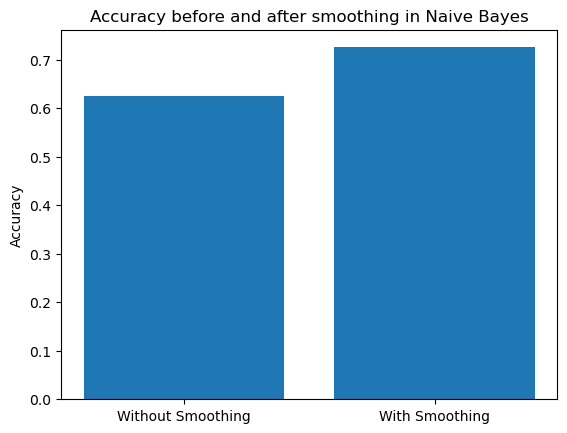

In [53]:
import matplotlib.pyplot as plt
# Accuracy values obtained before and after smoothing
accuracy_values = [accuracy_final, accuracy_smooth]
# Labels for the x-axis
x_labels = ['Without Smoothing', 'With Smoothing']
# Plot the bar chart
plt.bar(x_labels, accuracy_values)
# Add a title to the plot
plt.title('Accuracy before and after smoothing in Naive Bayes')
# Add a label to the y-axis
plt.ylabel('Accuracy')
# Display the plot
plt.show()

***CLASSIFICATION USING TENSOR FLOW***

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.layers import LSTM


In [55]:
#converting the dictionary into tuples
data = [(col1, col2) for col1, col2 in final.items()]
#then converting it into a dataframe for tensorflow 
df = pd.DataFrame(data, columns=['comments', 'class'])
print(df)

                                              comments            class
0    No one who has ever talked to anyone who has w...  MachineLearning
1    But does this "threaten" the stability of the ...  MachineLearning
2    AMD cares about Machine Learning otherwise the...  MachineLearning
3    There are lots of companies and lots of jobs, ...      datascience
4    Move to America. If you're as skilled as you t...      datascience
..                                                 ...              ...
992  âAre you alright with losing this game, guar...  MachineLearning
993  This. Making multiple variables as OP expresse...      datascience
994  This sounds like a scenario where they already...      datascience
995  I was thinking about the CyberTruck when I wro...  MachineLearning
996  Absolutely fantastic! How did you integrate yo...  MachineLearning

[997 rows x 2 columns]


In [56]:
# tokenize the comments
tokenizer = Tokenizer(num_words=5000, oov_token=True)
tokenizer.fit_on_texts(df['comments'])
X = tokenizer.texts_to_sequences(df['comments'])
X = pad_sequences(X, padding='post', maxlen=100)


In [57]:
print(X)

[[  54   52   73 ...    0    0    0]
 [  16  130   15 ...    0    0    0]
 [1730 2281   38 ...    0    0    0]
 ...
 [  15  557   39 ...    0    0    0]
 [   7   32  367 ...    0    0    0]
 [ 935 2229   41 ...    0    0    0]]


In [58]:
# Convert labels to one-hot encoded vectors
y = pd.get_dummies(df['class']).values

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [61]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Create another model for better accuracy
model1 = Sequential()
model1.add(Embedding(10000, 128, input_length=100))
model1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model1.add(Dense(32, activation='relu'))
model1.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [63]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 6s 180ms/step - loss: 1.0238 - accuracy: 0.4429 - val_loss: 0.9246 - val_accuracy: 0.4950
Epoch 2/10
13/13 [==============================] - 2s 144ms/step - loss: 0.9588 - accuracy: 0.4780 - val_loss: 0.9225 - val_accuracy: 0.4350
Epoch 3/10
13/13 [==============================] - 2s 145ms/step - loss: 0.9393 - accuracy: 0.4818 - val_loss: 0.9277 - val_accuracy: 0.4950
Epoch 4/10
13/13 [==============================] - 2s 148ms/step - loss: 0.9352 - accuracy: 0.4893 - val_loss: 0.9243 - val_accuracy: 0.4550
Epoch 5/10
13/13 [==============================] - 2s 145ms/step - loss: 0.9261 - accuracy: 0.5044 - val_loss: 0.9256 - val_accuracy: 0.4400
Epoch 6/10
13/13 [==============================] - 2s 145ms/step - loss: 0.9216 - accuracy: 0.5031 - val_loss: 0.9232 - val_accuracy: 0.4850
Epoch 7/10
13/13 [==============================] - 2s 145ms/step - loss: 0.9094 - accuracy: 0.5358 - val_loss: 0.9289 - val_accuracy: 0.4400
Epoch 

In [64]:
# Train the model
model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 10s 294ms/step - loss: 1.0494 - accuracy: 0.4404 - val_loss: 0.9401 - val_accuracy: 0.4300
Epoch 2/10
13/13 [==============================] - 3s 232ms/step - loss: 0.9546 - accuracy: 0.4316 - val_loss: 0.9450 - val_accuracy: 0.4400
Epoch 3/10
13/13 [==============================] - 3s 230ms/step - loss: 0.9399 - accuracy: 0.4467 - val_loss: 0.9246 - val_accuracy: 0.4700
Epoch 4/10
13/13 [==============================] - 3s 231ms/step - loss: 0.9344 - accuracy: 0.4730 - val_loss: 0.9271 - val_accuracy: 0.4400
Epoch 5/10
13/13 [==============================] - 3s 235ms/step - loss: 0.9330 - accuracy: 0.4668 - val_loss: 0.9248 - val_accuracy: 0.4750
Epoch 6/10
13/13 [==============================] - 3s 233ms/step - loss: 0.9218 - accuracy: 0.4680 - val_loss: 0.9296 - val_accuracy: 0.4350
Epoch 7/10
13/13 [==============================] - 3s 249ms/step - loss: 0.9094 - accuracy: 0.4956 - val_loss: 0.9218 - val_accuracy: 0.4800
Epoch

In [65]:
loss, accuracy_from_model1 = model1.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy_from_model1:.2f}')

Test Accuracy: 0.50


In [66]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.44


***Improving accuracy using Bagging in Naive Bayes ALgorithm***

In [67]:
def get_model(comments,classes):
    comment = {}
    for m in range(1000):
        key, value = random.choice(list(comments.items()))
        comment[key] =  value
    final ={}
    for k in range(len(comment)):
        for l in range(len(classes)):
            if list(comment.values())[k] == list(classes.keys())[l]:
                final[list(comment.keys())[k]] = list(classes.values())[l]
    return final,comment

***Applied Bagging once***

In [68]:
def bagging():
    samples = {}
    for lala in range(1):
    
        data_dev,com = get_model(comments,classes)
    
        com = list(comment.keys())

        word_counts = build_vocab(com)
        words = final_words(word_counts)
        word_occurrences, word_occurrences_AI, word_occurrences_ML,word_occurrences_DM = calc_probabilities(data_dev,words)
        accuracy_final = calc_accuracy(data_test,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM,words)
        accuracy_smooth = calc_accuracy_smooth(words,data_test,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM)
    

        samples[lala] = [
        {
        'classes': {0: 'MachineLearning', 1: 'ArtificialIntelligence', 2: 'DataScience'},
        'accuracy_rate_without_smoothing': accuracy_final,
        'accuracy_rate_with_smoothing': accuracy_smooth
        
        }
        ]
    return samples

In [69]:
bagging()

one


{0: [{'classes': {0: 'MachineLearning',
    1: 'ArtificialIntelligence',
    2: 'DataScience'},
   'accuracy_rate_without_smoothing': 0.6012024048096193,
   'accuracy_rate_with_smoothing': 0.6132264529058116}]}

***Applying Bagging 3x***

In [70]:
def bagging():
    samples = {}
    for lala in range(3):
    
        data_dev,com = get_model(comments,classes)
    
        com = list(comment.keys())

        word_counts = build_vocab(com)
        words = final_words(word_counts)
        word_occurrences, word_occurrences_AI, word_occurrences_ML,word_occurrences_DM = calc_probabilities(data_dev,words)
        accuracy_final = calc_accuracy(data_test,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM,words)
        accuracy_smooth = calc_accuracy_smooth(words,data_test,word_occurrences_AI, word_occurrences_ML,word_occurrences_DM)
    

        samples[lala] = [
        {
        'classes': {0: 'MachineLearning', 1: 'ArtificialIntelligence', 2: 'DataScience'},
        'accuracy_rate_without_smoothing': accuracy_final,
        'accuracy_rate_with_smoothing': accuracy_smooth
        
        }
        ]
    return samples

In [71]:
def best_model():
    dictionaries = bagging()
    for j in range(3):
        print(dictionaries[j])
        print("\n")
        print("***********")
  
    max = 0 
    best = {}
    for i in range(len(dictionaries)):
        if(dictionaries[i][0]['accuracy_rate_with_smoothing'] > max):
            max = dictionaries[i][0]['accuracy_rate_with_smoothing'] 
            best = dictionaries[i]
    print("\n")
    return best

print("best model with max accuracy rate: \n",best_model())


one
one
one
[{'classes': {0: 'MachineLearning', 1: 'ArtificialIntelligence', 2: 'DataScience'}, 'accuracy_rate_without_smoothing': 0.6412825651302605, 'accuracy_rate_with_smoothing': 0.7575150300601202}]


***********
[{'classes': {0: 'MachineLearning', 1: 'ArtificialIntelligence', 2: 'DataScience'}, 'accuracy_rate_without_smoothing': 0.6372745490981964, 'accuracy_rate_with_smoothing': 0.6513026052104208}]


***********
[{'classes': {0: 'MachineLearning', 1: 'ArtificialIntelligence', 2: 'DataScience'}, 'accuracy_rate_without_smoothing': 0.6312625250501002, 'accuracy_rate_with_smoothing': 0.657314629258517}]


***********


best model with max accuracy rate: 
 [{'classes': {0: 'MachineLearning', 1: 'ArtificialIntelligence', 2: 'DataScience'}, 'accuracy_rate_without_smoothing': 0.6412825651302605, 'accuracy_rate_with_smoothing': 0.7575150300601202}]


In [81]:
Acc_with_bag = 0.757515030060120

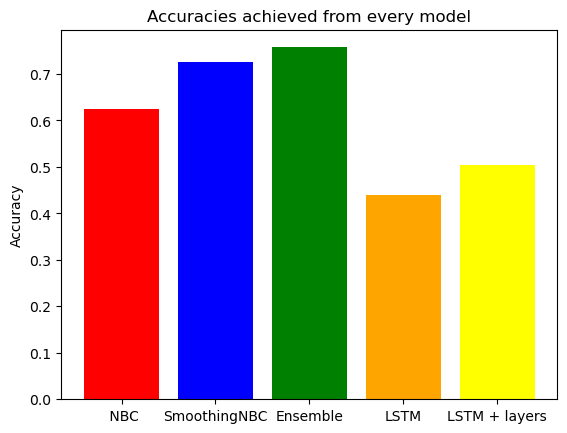

In [89]:
import matplotlib.pyplot as plt

# Accuracy values obtained before and after smoothing
accuracy_values = [accuracy_final, accuracy_smooth,Acc_with_bag,accuracy,accuracy_from_model1]

# Labels for the x-axis
x_labels = [' NBC', 'SmoothingNBC','Ensemble','LSTM', 'LSTM + layers' ]

# Colors for each x-value
colors = ['red', 'blue', 'green', 'orange','yellow']

# Plot the bar chart with colors
plt.bar(x_labels, accuracy_values, color=colors)

# Add a title to the plot
plt.title('Accuracies achieved from every model')

# Add a label to the y-axis
plt.ylabel('Accuracy')

# Display the plot
plt.show()